In [ ]:
import os
import pandas as pd

root_2018 = '2018_Q1_1'
root_2020 = '2020_Q2_4'


def scan_apk_files(root_path):
    data = []

    for method in os.listdir(root_path):
        method_folder = os.path.join(root_path, method)
        if os.path.isdir(method_folder):
            # Get all APK files in this method folder
            apk_files = [f for f in os.listdir(method_folder) if f.endswith('.apk')]
            for apk in apk_files:
                # Store file info in a list
                data.append({
                    'file_name': apk,
                    'obfuscation_method': method,
                    'file_path': os.path.join(method_folder, apk)
                })
    return pd.DataFrame(data)


df_2018 = scan_apk_files(root_2018)
df_2020 = scan_apk_files(root_2020)


combined_df = pd.concat([df_2018, df_2020], ignore_index=True)


print("Combined dataset of APK files:")
print(combined_df.head())


print("\nNumber of APK files by obfuscation method:")
print(combined_df['obfuscation_method'].value_counts())


print("\nMissing values in dataset:")
print(combined_df.isnull().sum())


combined_df.to_csv('combined_apk_dataset.csv', index=False)


Combined dataset of APK files:
                                           file_name obfuscation_method  \
0  6a8227b14b7dda782bc67c2b87384b5700ff902e022ad9...               code   
1  2e821b3456fad74b2f30345ef37cd396c9deb25c30afed...               code   
2  c3b5bb691007762db3546b9e3b3e38406da1d29c03855c...               code   
3  133feafd4ba660f8460430f7f5982b8d4b851ac4741b26...               code   
4  70e853f7f9848549916904673d6f7f0f0b49f3d83b6125...               code   

                                           file_path  
0  /kaggle/input/android-obfucation-dataset/2018_...  
1  /kaggle/input/android-obfucation-dataset/2018_...  
2  /kaggle/input/android-obfucation-dataset/2018_...  
3  /kaggle/input/android-obfucation-dataset/2018_...  
4  /kaggle/input/android-obfucation-dataset/2018_...  

Number of APK files by obfuscation method:
obfuscation_method
code           251
encryption     116
renaming        64
mix             34
refelection     28
trivial         16
Name: count

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os


csv_14579_path = 'android-csv/14579 (1).csv'
csv_16279_path = 'android-csv/16279 (1).csv'


df_14579 = pd.read_csv(csv_14579_path)
df_16279 = pd.read_csv(csv_16279_path)


def get_apk_file_names(folder_path):
    apk_files = []

    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):

            for apk in os.listdir(subfolder_path):
                if apk.endswith('.apk'):
                    apk_files.append(apk)
    return apk_files


apk_files_2018 = get_apk_file_names(root_2018)
apk_files_2020 = get_apk_file_names(root_2020)


apk_files = apk_files_2018 + apk_files_2020


filtered_df_14579 = df_14579[df_14579['file_name'].isin(apk_files)]
filtered_df_16279 = df_16279[df_16279['file_name'].isin(apk_files)]


combined_filtered_df = pd.concat([filtered_df_14579, filtered_df_16279], ignore_index=True)


output_csv_path = 'filtered_apk_dataset.csv'
combined_filtered_df.to_csv(output_csv_path, index=False)


print(combined_filtered_df.head())


                                           file_name  \
0  6647010bf44aa24e874fe574ef1163a1fe86bc9f076b8e...   
1  3b8fedc30b7ded43202f0b3677f82bb439bcf2c36a7513...   
2  8282218eaea68ae3adcf7b9a599679b8220a4c22708d34...   
3  0b466c80cc3a2feb0eb40897053153d6ed2eaee6cb6dfd...   
4  f28a664fe93e2f5f5be187f4c347dbdc9719971e0a836d...   

                                         sha256_hash  \
0  6647010bf44aa24e874fe574ef1163a1fe86bc9f076b8e...   
1  3b8fedc30b7ded43202f0b3677f82bb439bcf2c36a7513...   
2  8282218eaea68ae3adcf7b9a599679b8220a4c22708d34...   
3  0b466c80cc3a2feb0eb40897053153d6ed2eaee6cb6dfd...   
4  f28a664fe93e2f5f5be187f4c347dbdc9719971e0a836d...   

                       path  year quarter  month       method family_name  
0  2018_Q1_1.7z/refelection  2018      Q1      1  refelection      secneo  
1     2018_Q1_1.7z/renaming  2018      Q1      1     renaming      smsspy  
2         2018_Q1_1.7z/code  2018      Q1      1         code      dnotua  
3  2018_Q1_1.7z/refele

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   file_name    952 non-null    object
 1   sha256_hash  952 non-null    object
 2   path         952 non-null    object
 3   year         952 non-null    int64 
 4   quarter      952 non-null    object
 5   month        952 non-null    int64 
 6   method       952 non-null    object
 7   family_name  443 non-null    object
dtypes: int64(2), object(6)
memory usage: 59.6+ KB

Summary Statistics:
              year       month
count   952.000000  952.000000
mean   2018.598739    1.898109
std       0.916445    1.374668
min    2018.000000    1.000000
25%    2018.000000    1.000000
50%    2018.000000    1.000000
75%    2020.000000    4.000000
max    2020.000000    4.000000

Missing Values:
file_name        0
sha256_hash      0
path             0
year             0
quarter          0
mo

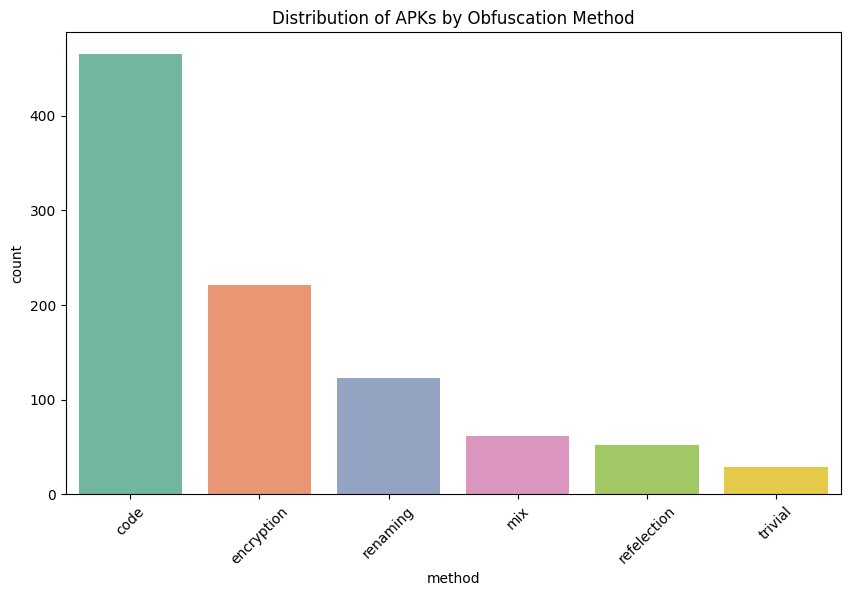

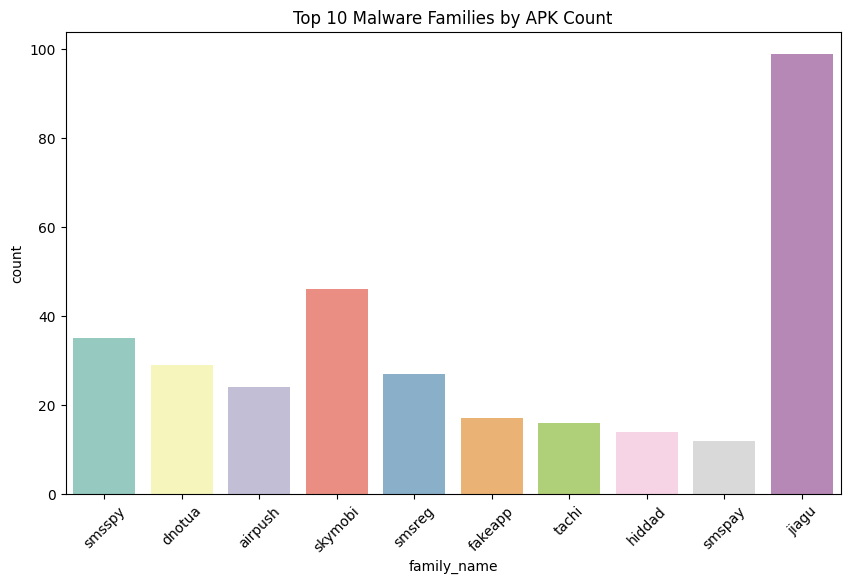

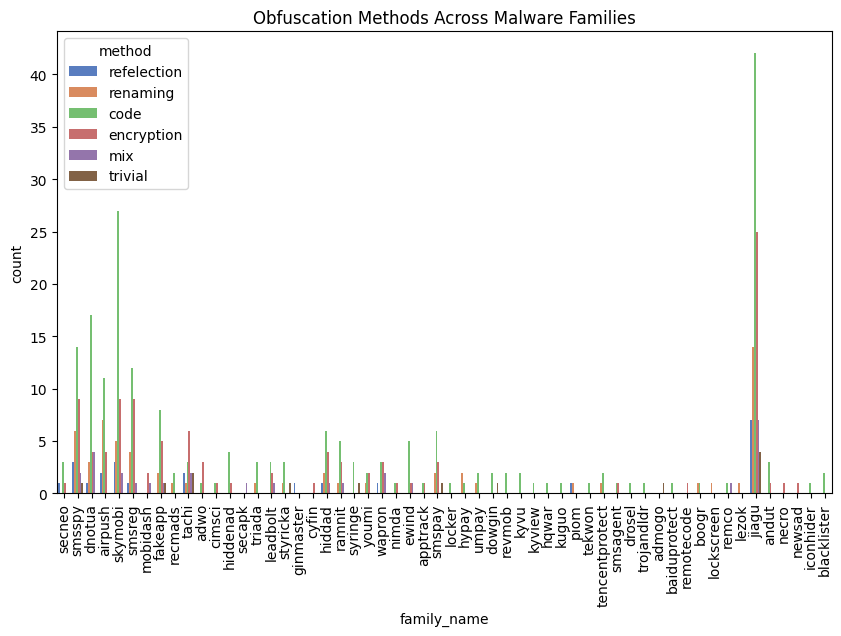

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered APK dataset
csv_file_path = 'filtered_apk_dataset.csv'
df = pd.read_csv(csv_file_path)


print("Dataset Information:")
df.info()


print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique obfuscation methods:", df['method'].unique())
print("\nUnique family names:", df['family_name'].unique())

method_distribution = df['method'].value_counts()
print("\nObfuscation method distribution:")
print(method_distribution)


family_distribution = df['family_name'].value_counts()
print("\nFamily distribution:")
print(family_distribution)


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='method', order=method_distribution.index, palette='Set2')
plt.title('Distribution of APKs by Obfuscation Method')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
top_families = family_distribution.head(10).index  # Plot only top 10 families
sns.countplot(data=df[df['family_name'].isin(top_families)], x='family_name', palette='Set3')
plt.title('Top 10 Malware Families by APK Count')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='family_name', hue='method', palette='muted')
plt.title('Obfuscation Methods Across Malware Families')
plt.xticks(rotation=90)
plt.show()


Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognized: refelection
Method not recognize

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


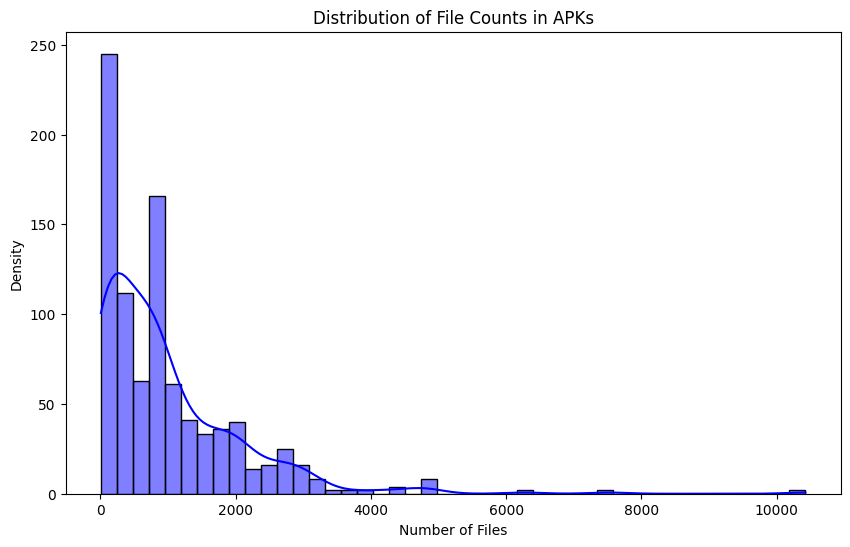

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


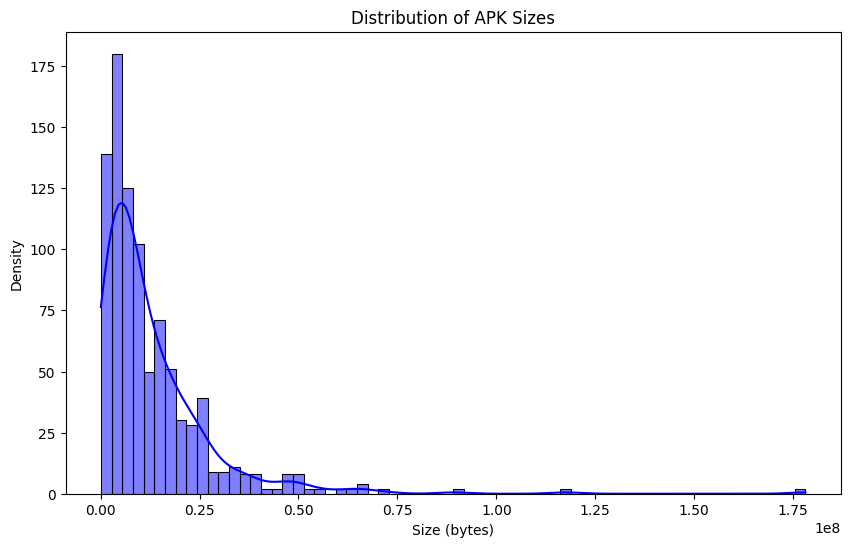

/tmp/ipykernel_30/2902884166.py:117: UserWarning: Glyph 37815 (\N{CJK UNIFIED IDEOGRAPH-93B7}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_30/2902884166.py:117: UserWarning: Glyph 28060 (\N{CJK UNIFIED IDEOGRAPH-6D9C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_30/2902884166.py:117: UserWarning: Glyph 58641 (\ue511) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_30/2902884166.py:117: UserWarning: Glyph 37813 (\N{CJK UNIFIED IDEOGRAPH-93B5}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_30/2902884166.py:117: UserWarning: Glyph 23339 (\N{CJK UNIFIED IDEOGRAPH-5B2B}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_30/2902884166.py:117: UserWarning: Glyph 28288 (\N{CJK UNIFIED IDEOGRAPH-6E80}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_30/2902884166.py:117: UserWarning: Glyph 38334 (\N{CJK UNIFIED IDEOGRAPH-95BE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_30/29028

<Figure size 1200x600 with 0 Axes>

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37815 (\N{CJK UNIFIED IDEOGRAPH-93B7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28060 (\N{CJK UNIFIED IDEOGRAPH-6D9C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 58641 (\ue511) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37813 (\N{CJK UNIFIED IDEOGRAPH-93B5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23339 (\N{CJK UNIFIED IDEOGRAPH-5B2B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/sit

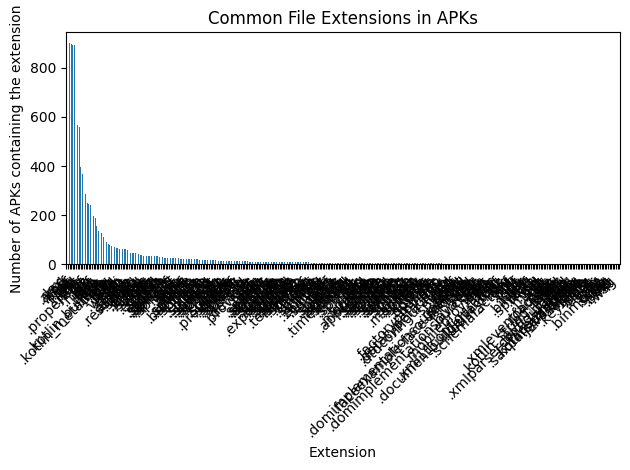

In [ ]:
import os
import zipfile
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_apk(apk_path):
    try:
        with zipfile.ZipFile(apk_path, 'r') as zip_ref:
            file_list = zip_ref.namelist()

            # Basic counts
            file_count = len(file_list)
            dex_count = sum(1 for name in file_list if name.endswith('.dex'))

            # Analyze file types
            file_extensions = Counter(os.path.splitext(file)[1].lower() for file in file_list if os.path.splitext(file)[1])

            # Analyze folder structure
            folders = Counter(name.split('/')[0] for name in file_list if '/' in name)

            # Check for specific files or folders
            has_res_folder = any(name.startswith('res/') for name in file_list)
            has_lib_folder = any(name.startswith('lib/') for name in file_list)
            has_assets_folder = any(name.startswith('assets/') for name in file_list)
            has_classes_dex = 'classes.dex' in file_list

            # Analyze resources
            resource_types = Counter(name.split('/')[1] for name in file_list if name.startswith('res/') and '/' in name.split('/')[1])

            return {
                'file_name': os.path.basename(apk_path),
                'file_count': file_count,
                'dex_count': dex_count,
                'file_extensions': dict(file_extensions),
                'folders': dict(folders),
                'has_res_folder': has_res_folder,
                'has_lib_folder': has_lib_folder,
                'has_assets_folder': has_assets_folder,
                'has_classes_dex': has_classes_dex,
                'resource_types': dict(resource_types),
                'size': os.path.getsize(apk_path)
            }
    except Exception as e:
        print(f"Error processing {apk_path}: {str(e)}")
        return None

def process_apk_files_from_csv(csv_path, root_folders):
    # Load the filtered CSV file
    df = pd.read_csv(csv_path)

    results = []
    for _, row in df.iterrows():
        method = row['method']  # Assuming 'method' column contains the folder names
        apk_file_name = row['file_name']

        # Determine which root folder to use based on the method
        if method in ['code', 'encryption', 'mix', 'reflection', 'renaming', 'trivial']:
            # Loop through both root folders
            for root_folder in root_folders:
                apk_path = os.path.join(root_folder, method, apk_file_name)  # Construct the full path

                if os.path.exists(apk_path):  # Check if the APK exists
                    features = analyze_apk(apk_path)
                    if features:
                        results.append(features)
                    break  # Stop checking other folders once found
        else:
            print(f"Method not recognized: {method}")

    return results

def visualize_results(results):
    # Create DataFrame from results
    df = pd.DataFrame(results)

    # Check if the DataFrame is populated correctly
    if df.empty:
        print("No data available for visualization.")
        return

    # File count distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='file_count', kde=True, color='blue')
    plt.title('Distribution of File Counts in APKs')
    plt.xlabel('Number of Files')
    plt.ylabel('Density')
    plt.show()

    # Size distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='size', kde=True, color='blue')
    plt.title('Distribution of APK Sizes')
    plt.xlabel('Size (bytes)')
    plt.ylabel('Density')
    plt.show()

    # Common file extensions
    all_extensions = set()
    for result in results:
        all_extensions.update(result['file_extensions'].keys())

    ext_data = []
    for ext in all_extensions:
        ext_count = sum(1 for r in results if ext in r['file_extensions'])
        ext_data.append({'Extension': ext, 'Count': ext_count})

    ext_df = pd.DataFrame(ext_data)
    ext_df = ext_df.sort_values('Count', ascending=False)

    plt.figure(figsize=(12, 6))
    ext_df.plot(x='Extension', y='Count', kind='bar', legend=False)
    plt.title('Common File Extensions in APKs')
    plt.ylabel('Number of APKs containing the extension')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Main script execution

# Define the path to your filtered CSV file
filtered_csv_path = '/kaggle/working/filtered_apk_dataset.csv'  # Update this path

# Define the root paths to the folders containing your APK files
root_folders = [
    '/kaggle/input/android-obfucation-dataset/2018_Q1_1',  # First root folder
    '/kaggle/input/android-obfucation-dataset/2020_Q2_4'   # Second root folder
]

# Process APK files from the CSV
results = process_apk_files_from_csv(filtered_csv_path, root_folders)

# Visualize results
visualize_results(results)


In [ ]:
!pip install androguard==3.3.2

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import pandas as pd
from androguard.core.bytecodes.apk import APK

def extract_features_from_obfuscated_apk(apk_path):
    features = {
        'file_name': os.path.basename(apk_path),
        'size': os.path.getsize(apk_path),
        'dex_count': 0,
        'permissions': []
    }

    try:
        # Initialize APK with Androguard
        apk = APK(apk_path)
        features['dex_count'] = len(apk.get_dex())
        features['permissions'] = apk.get_permissions()

    except Exception as e:
        print(f"Error processing {apk_path}: {str(e)}")

    return features

def process_obfuscated_apk_files(csv_path, root_folders):

    df = pd.read_csv(csv_path)

    all_features = []

    for _, row in df.iterrows():
        method = row['method']
        apk_file_name = row['file_name']

        for root_folder in root_folders:
            apk_path = os.path.join(root_folder, method, apk_file_name)
            if os.path.exists(apk_path):
                features = extract_features_from_obfuscated_apk(apk_path)


                combined_features = {**features, **row.to_dict()}
                all_features.append(combined_features)
                break

    return pd.DataFrame(all_features)

# Define the paths to your CSV and root folders
filtered_csv_path = 'filtered_apk_dataset.csv'  # Update this path
root_folders = [
    '2018_Q1_1',
    '2020_Q2_4'
]


features_df = process_obfuscated_apk_files(filtered_csv_path, root_folders)


features_df.to_csv('/kaggle/working/apk_combined_features.csv', index=False)


print(features_df.head())


                                           file_name      size  dex_count  \
0  6647010bf44aa24e874fe574ef1163a1fe86bc9f076b8e...  26154260    5452476   
1  3b8fedc30b7ded43202f0b3677f82bb439bcf2c36a7513...   7643947     744168   
2  8282218eaea68ae3adcf7b9a599679b8220a4c22708d34...  33087309    7343372   
3  0b466c80cc3a2feb0eb40897053153d6ed2eaee6cb6dfd...  10476579    6793776   
4  f28a664fe93e2f5f5be187f4c347dbdc9719971e0a836d...  12545082    1748376   

                                         permissions  \
0  [android.permission.INTERNET, android.permissi...   
1  [android.permission.INTERNET, android.permissi...   
2  [android.permission.INTERNET, android.permissi...   
3  [android.permission.INTERNET, android.permissi...   
4  [android.permission.ACCESS_NETWORK_STATE, andr...   

                                         sha256_hash  \
0  6647010bf44aa24e874fe574ef1163a1fe86bc9f076b8e...   
1  3b8fedc30b7ded43202f0b3677f82bb439bcf2c36a7513...   
2  8282218eaea68ae3adcf7b9a59967

In [ ]:

from tqdm import tqdm

def extract_features_from_apk(apk_path):
    features = {
        'file_name': os.path.basename(apk_path),
        'size': os.path.getsize(apk_path),
        'dex_count': 0,
        'permissions': []
    }

    try:

        apk = APK(apk_path)
        features['dex_count'] = len(apk.get_dex())
        features['permissions'] = apk.get_permissions()

    except Exception as e:
        print(f"Error processing {apk_path}: {str(e)}")

    return features

def process_apk_folders(root_folder):
    categories = ["Benign", "Malware"]
    all_features = []

    for category in categories:
        category_path = os.path.join(root_folder, category)
        label = 1 if category == "Malware" else 0  # Label: 1 for Malware, 0 for Benign

        apk_files = [os.path.join(category_path, apk) for apk in os.listdir(category_path) if apk.endswith('.apk')]

        for apk_path in tqdm(apk_files, desc=f"Processing {category} APKs"):
            features = extract_features_from_apk(apk_path)
            features['label'] = label  # Add the label for classification (Malware or Benign)
            all_features.append(features)

    return pd.DataFrame(all_features)


root_folder = 'apk-files'  # Update this path as needed

# Process APK files to extract features and label them by category
non_ob_features_df = process_apk_folders(root_folder)

# Save the combined features DataFrame to a CSV for model training
non_ob_features_df.to_csv('apk_combined_features.csv', index=False)

# Display the extracted features with combined details
print(non_ob_features_df.head())


Processing Malware APKs: 100%|██████████| 79/79 [00:02<00:00, 29.00it/s]

                                           file_name     size  dex_count  \
0  BenignB195D0B0486962CB1EC486AA959AE3BA26B1A05B...   587386     608016   
1  BenignC053A6CC3291E71A73A4232E25923081D64C0ACE...  2057081    3784836   
2  Benign0F488FB14ADF7149F35ADC700451B5224EE5BA46...  1983542    4173296   
3  BenignC3349B7AEA36E4D4F5F8ABEEE2E6124B3DBCE18A...  1451849    2228880   
4  Benign9416E60293103C1089E0F0497C23194F148AF2EB...  1516208    2781604   

                                         permissions  label  
0  [android.permission.WRITE_EXTERNAL_STORAGE, an...      0  
1  [android.permission.READ_EXTERNAL_STORAGE, and...      0  
2  [android.permission.INTERNET, android.permissi...      0  
3  [android.permission.INTERNET, android.permissi...      0  
4  [android.permission.WRITE_EXTERNAL_STORAGE, an...      0  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report


ob_features_df = features_df
non_ob_features_df =non_ob_features_df

common_columns = list(set(ob_features_df.columns) & set(non_ob_features_df.columns))
ob_features_df = ob_features_df[common_columns]
non_ob_features_df = non_ob_features_df[common_columns]



ob_features_df['obfuscation_label'] = 1
non_ob_features_df['obfuscation_label'] = 0


combined_df = pd.concat([ob_features_df, non_ob_features_df], ignore_index=True)

# Encode permissions with MultiLabelBinarizer
mlb = MultiLabelBinarizer()
permissions_encoded = mlb.fit_transform(combined_df['permissions'])

# Combine encoded permissions with the rest of the features
permissions_df = pd.DataFrame(permissions_encoded, columns=mlb.classes_)
combined_df = pd.concat([combined_df.drop(columns=['permissions']), permissions_df], axis=1)

# Define features and target
X = combined_df.drop(columns=['file_name', 'obfuscation_label'])
y = combined_df['obfuscation_label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


/tmp/ipykernel_30/118074998.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ob_features_df['obfuscation_label'] = 1


              precision    recall  f1-score   support

           0       1.00      0.86      0.92        57
           1       0.97      1.00      0.99       291

    accuracy                           0.98       348
   macro avg       0.99      0.93      0.96       348
weighted avg       0.98      0.98      0.98       348



In [ ]:
combined_df

,size,dex_count,file_name,obfuscation_label,,ACCESS_WIFI_STATE,MediaStore.Images.Media.EXTERNAL_CONTENT_URI,MediaStore.Images.Media.INTERNAL_CONTENT_URI,READ_PHONE_STATE,adnroid.permission.ACCESS_CHECKIN_PROPERTTES,...,p4d236d9a.ped741845.pd638d193.push.permission.MESSAGE,p4d236d9a.pfd66827c.p6e79120d.permission.JPUSH_MESSAGE,qiku.permission.ACCESS_QKPARAMS,qiku.permission.READ_WRITE_SAFE_SPACE,sec.android.permission.READ_MSG_PREF,telecom.mdesk.permission.READ_SETTINGS,telecom.mdesk.permission.WRITE_SETTINGS,welfare.permission.scheme,xvtian.gai.receiver,yulong.permission.ACCESS_YLPARAMS
0,26154260,5452476,6647010bf44aa24e874fe574ef1163a1fe86bc9f076b8e...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7643947,744168,3b8fedc30b7ded43202f0b3677f82bb439bcf2c36a7513...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33087309,7343372,8282218eaea68ae3adcf7b9a599679b8220a4c22708d34...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10476579,6793776,0b466c80cc3a2feb0eb40897053153d6ed2eaee6cb6dfd...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12545082,1748376,f28a664fe93e2f5f5be187f4c347dbdc9719971e0a836d...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,1508553,1537632,APK00462DD04608B7B4A3AEF59A75012EA725095BD531C...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1154,2001466,5996,APK0028CE173E65CF44488F11D3FB5794008CE1BCAE9C4...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1155,1700659,5880,APK00E81EBCCC1E1235310C23D4241B828D4F321747C09...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1156,1325574,201348,APK00A341363499F48E9B986A0D00DCF59CAF028B12F6E...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pickle
import joblib

In [ ]:
joblib.dump(clf, 'random_forest_model.pkl')
with open('multi_label_binarizer.pkl', 'wb') as f:
    pickle.dump(mlb, f)

In [2]:
!pip install androguard==3.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.9/661.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.6 MB/s eta 0:00:00


In [6]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [5]:
import os
import pickle
import joblib
from androguard.core.bytecodes.apk import APK
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# Load the model and MultiLabelBinarizer
def load_model_and_mlb():
    try:
        with open('/content/drive/MyDrive/APK_Obfucation_data/multi_label_binarizer.pkl', 'rb') as file:
            mlb = pickle.load(file)
        model = joblib.load('/content/drive/MyDrive/APK_Obfucation_data/random_forest_model.pkl')
        print("✓ Model loaded successfully!")
        return model, mlb
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None

# Create widgets
upload_widget = widgets.FileUpload(
    accept='.apk',
    multiple=False,
    description='Select APK',
    layout=widgets.Layout(width='300px')
)

status_output = widgets.Output()
predict_button = widgets.Button(
    description='Analyze APK',
    button_style='primary',
    layout=widgets.Layout(width='150px')
)

def extract_features(apk_path):
    """Extract features from APK file"""
    try:
        apk = APK(apk_path)
        return {
            'size': os.path.getsize(apk_path),
            'dex_count': len(apk.get_dex()),
            'permissions': list(apk.get_permissions())
        }
    except Exception as e:
        raise Exception(f"Error extracting features: {str(e)}")

def process_apk(b):
    """Handle the APK analysis when button is clicked"""
    with status_output:
        clear_output()
        if not upload_widget.value:
            print("Please upload an APK file first!")
            return

        print("Analyzing APK...")
        try:
            # Load model if not already loaded
            model, mlb = load_model_and_mlb()
            if not model or not mlb:
                print("Failed to load model. Please check model files.")
                return

            # Get the uploaded file
            uploaded_file = list(upload_widget.value.values())[0]
            temp_path = f"/content/temp_{uploaded_file['metadata']['name']}"

            # Save uploaded file temporarily
            with open(temp_path, 'wb') as f:
                f.write(uploaded_file['content'])

            # Extract features
            features = extract_features(temp_path)

            # Prepare input data
            permissions_encoded = mlb.transform([features['permissions']])
            permissions_df = pd.DataFrame(permissions_encoded, columns=mlb.classes_)

            input_data = pd.DataFrame({
                'size': [features['size']],
                'dex_count': [features['dex_count']]
            })

            final_input = pd.concat([input_data, permissions_df], axis=1)

            # Make prediction
            prediction = model.predict(final_input)[0]
            confidence = max(model.predict_proba(final_input)[0]) * 100

            # Display results
            result = "Obfuscated ⚠️" if prediction == 1 else "Not Obfuscated ✓"
            display(HTML(f"""
            <div style='background-color: #f0f0f0; padding: 15px; border-radius: 5px;'>
                <h3>Analysis Results</h3>
                <p><b>Status:</b> {result}</p>
                <p><b>Confidence:</b> {confidence:.2f}%</p>
                <p><b>File Size:</b> {features['size']/1024:.2f} KB</p>
                <p><b>DEX Count:</b> {features['dex_count']}</p>
            </div>
            """))

            # Display permissions
            if len(features['permissions']) > 0:
                display(HTML("<div style='margin-top: 15px;'><h4>Detected Permissions:</h4></div>"))
                for perm in sorted(features['permissions']):
                    print(f"• {perm}")

            # Cleanup
            os.remove(temp_path)

        except Exception as e:
            print(f"Error during analysis: {str(e)}")

# Bind button click event
predict_button.on_click(process_apk)

# Display widgets
display(widgets.HTML("<h2>APK Obfuscation Detector</h2>"))
display(widgets.VBox([upload_widget, predict_button, status_output]))


HTML(value='<h2>APK Obfuscation Detector</h2>')